## 🧠 Step 1: Load Libraries and Dataset
This cell will load the necessary Python libraries and read in the dataset so we can begin our analysis.

In [1]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 🔍 Step 2: Understand the Data
Let’s explore the structure of the dataset and get a feel for the feature types and missing or abnormal values.

In [3]:
# Basic info and structure
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 📊 Step 3: Exploratory Data Analysis (EDA)
We’ll visualize class imbalance and distributions of some key features.

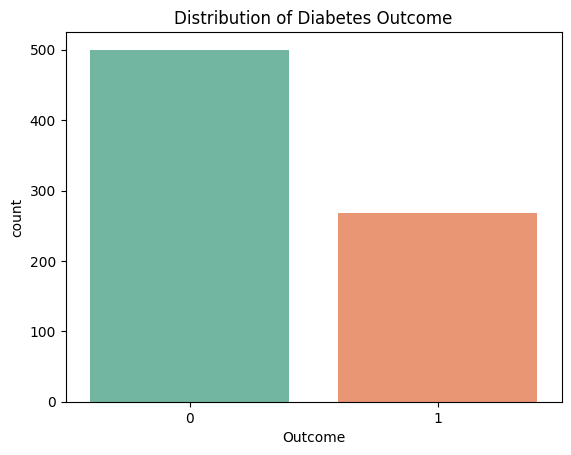

In [4]:
# Check for class imbalance
sns.countplot(data=df, x='Outcome', palette='Set2')
plt.title('Distribution of Diabetes Outcome')
plt.show()



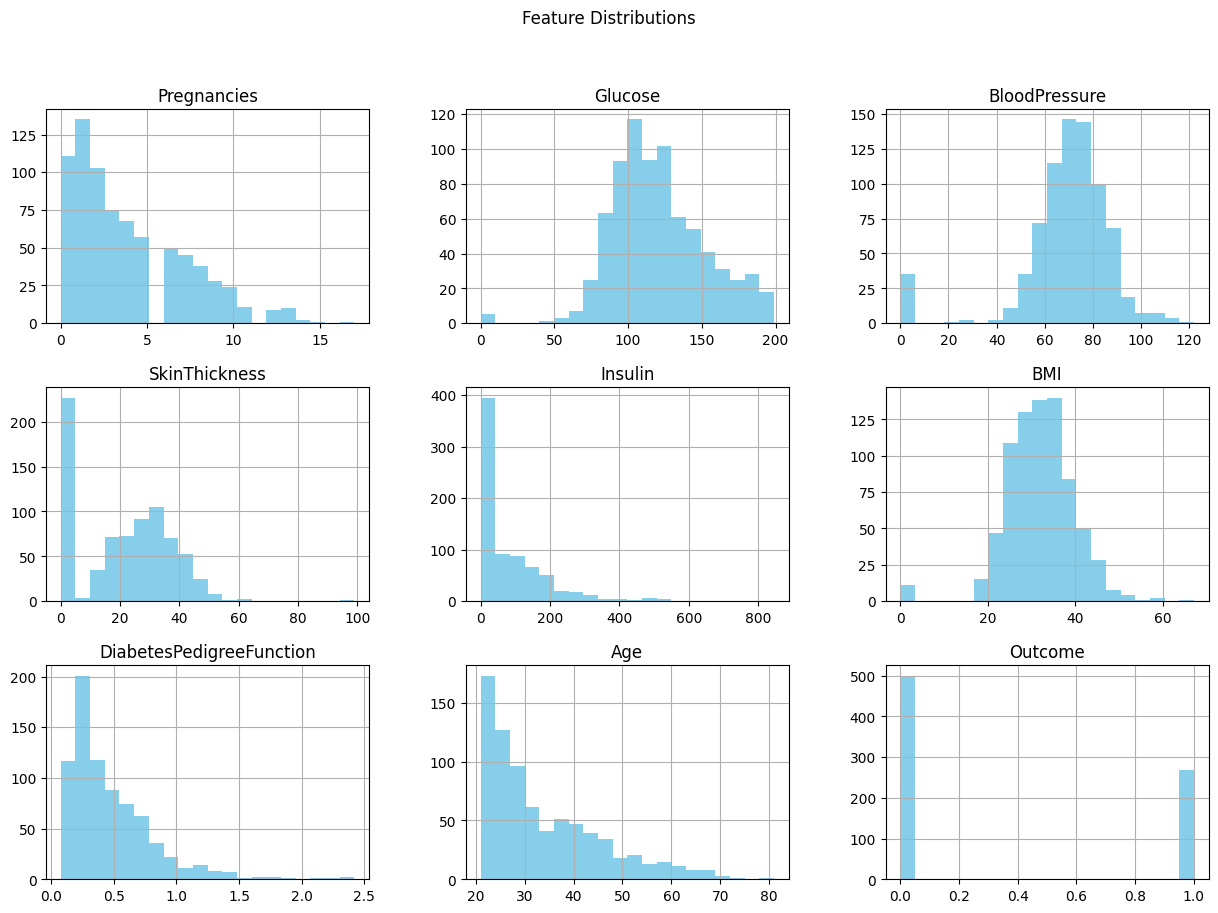

In [5]:
# Visualizing distribution of features
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()

## ⚠️ Step 4: Handle Zero Values (Which Are Not Valid in Some Columns)
Certain medical measures like Glucose or BMI shouldn't be zero. Let’s replace zeros with NaN and fill with median values.

In [6]:
# Replace zero values with NaN
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Fill missing values with median
df.fillna(df.median(), inplace=True)


## 🧪 Step 5: Split Data into Train and Test Sets
We’ll split the data into training and testing sets so we can evaluate performance on unseen data.

In [7]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 🌲 Step 6: Train a Random Forest Classifier
Now we’ll train a Random Forest classifier using the training data.

In [8]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📈 Step 7: Evaluate the Model
We’ll evaluate the model using accuracy, classification report, and confusion matrix.

In [9]:
# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.7792207792207793
📄 Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



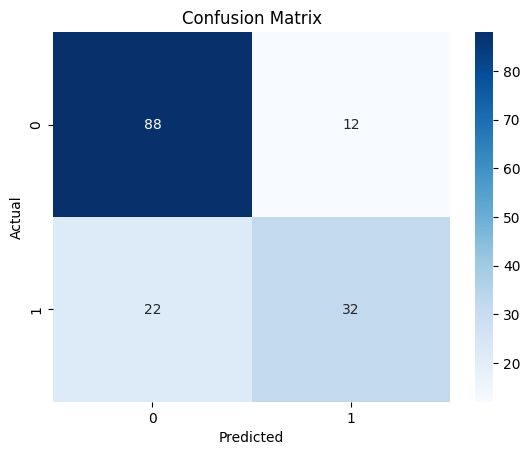

In [10]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 🧬 Step 8: Feature Importance
Let’s visualize which features contributed most to the predictions.

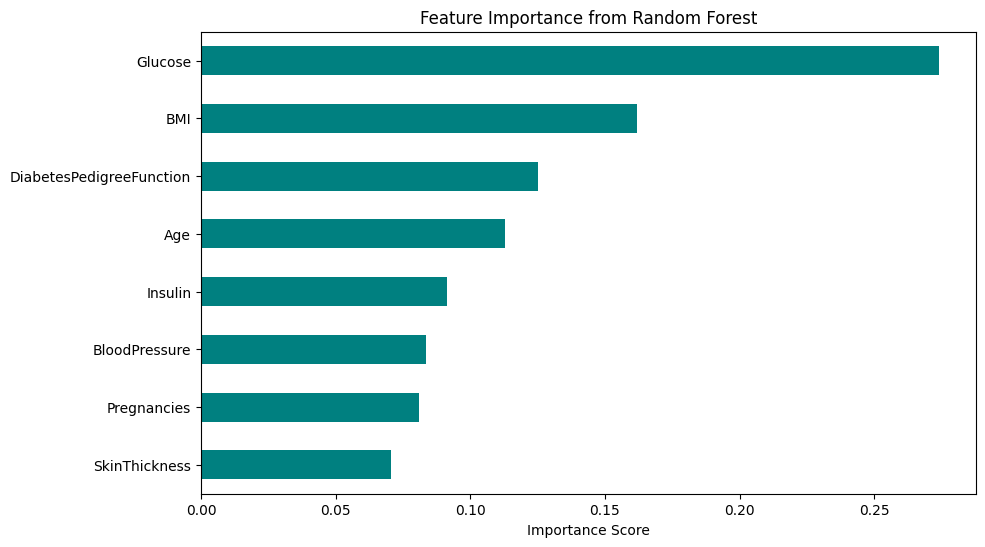

In [11]:
# Feature importance plot
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.show()


## 📉 Step 9: Plot ROC Curve
ROC curve gives a good sense of the model’s classification threshold and performance.

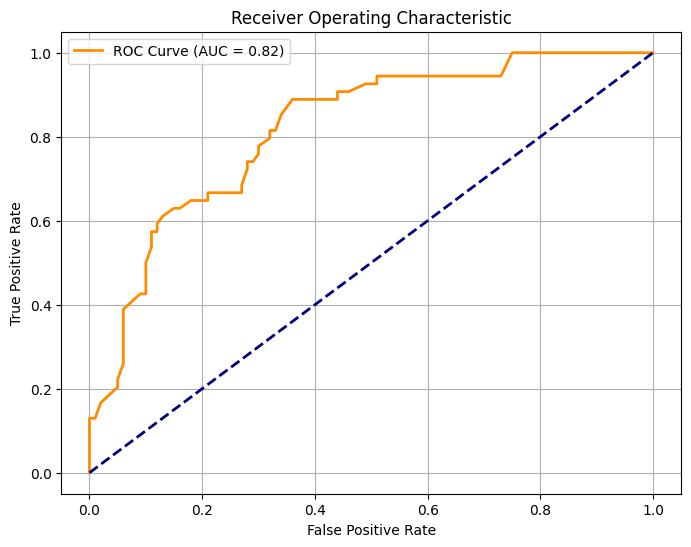

In [12]:
# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()


## 💾 Step 10: Save the Model
You can save the trained model for future use.



In [13]:
import joblib

# Save model
joblib.dump(rf_model, 'diabetes_rf_model.pkl')


['diabetes_rf_model.pkl']